In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import csv
import os, sys
from latexifypaper import *
from csv_plot import *
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from matplotlib import gridspec

In [2]:
def csv_to_table(file_name, delimiter=',', row_headers=True):
    with open(file_name, 'r') as csv_file:  
        csv_reader = csv.reader(csv_file, delimiter=delimiter)
        groups = next(csv_reader)[1:]
        names = []
        data = []
        for row in csv_reader:
            if row_headers:
                names.append(row[0])
                # print([type(x) for x in row[1:] ])
                #print(row)
                #print()
                row2 = []
                for r in row[1:]:
                    if r == '':
                        row2.append(float('nan'))
                    else:
                        row2.append(float(r))
                data.append(list(row2))
                #data.append(list(map(lambda x: float(x), row[1:])))
            else:
                data.append(list(map(lambda x: float(x), row)))
    return groups, names, np.array(data)

In [3]:
# def plot_figure_with_error_bar(names, data, color_list):
#     '''
#     each column of data is a line
#     the name follows the pattern like ['fp Nystrom-x', 'fp Nystrom-y', 'fp Nystrom-y_std', 'fp RFF-x', 'fp RFF-y', 'fp RFF-y_std']
#     '''
#     marker_list = ['o', 'v', '^', 's', 'h']
#     for i in range(data.shape[1] // 3):
#         idx = i * 3
#         label = names[idx].split("-")[0]
#         print "label ", names[idx], label
#         x = data[:, idx]
#         average_y = data[:, idx + 1]
#         std_y = data[:, idx + 2]
# #         print x, average_y, std_y   
#         plt.errorbar(x, average_y, yerr=std_y, label=label, marker=marker_list[i], markeredgecolor=colors[i % len(color_list)], fmt="-o", linewidth=1, capsize=3.5, capthick=1, color=colors[i % len(color_list)])

In [4]:
# def set_fig_xtick(values, labels, fontsize):
#     ax = plt.gca()
#     ax.set_xticks(values)
#     ax.set_xticklabels(labels)
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=fontsize)
    
# def set_fig_ytick(values, labels, fontsize):
#     ax = plt.gca()
#     ax.set_yticks(values)
#     ax.set_yticklabels(labels)
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=fontsize)

In [5]:
csv_file_name = "/Users/Jian/Data/research/lp_kernel/lp_kernel/paper/data_for_plot/regression_l2_vs_mem.csv"

In [6]:
groups, names, data = csv_to_table(csv_file_name)
names = names[1:]
print groups
print names
# print data.shape
# print data[:, 0], data[:, 1], data[:, 2]

['fp Nystrom-x', 'fp Nystrom-y', 'fp Nystrom-y_std', 'fp RFF-x', 'fp RFF-y', 'fp RFF-y_std', 'lp cir. RFF 8 bits-x', 'lp cir. RFF 8 bits-y', 'lp cir. RFF 8 bits-y_std', 'lp cir. RFF 4 bits-x', 'lp cir. RFF 4 bits-y', 'lp cir. RFF 4 bits-y_std']
['1', '2', '3', '4', '5', '6', '7']


In [7]:
label_font=12
legend_font = 10

label  fp Nystrom-x fp Nystrom


NameError: global name 'colors' is not defined

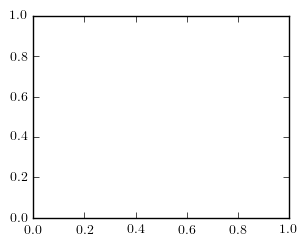

In [8]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
latexify(columns=1)
plt.figure()
fig = plt.figure(figsize=[3.3, 2.6])
ax = plt.subplot(111)
plot_figure_with_error_bar(groups, data[:, :12], colors)
plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.ylim([2.5e7, 1e8])
# set_fig_xtick(np.arange(0, 60001, 10000) / float(250), [str(int(num/1000)) + "k" for num in range(0, 60001, 10000)], 18),
set_fig_ytick([2.5e7, 1e8], [r"$2.5e^7$", "$1e^8$"], label_font)
plt.xlabel("Memory (bits)", fontsize=label_font)
plt.ylabel("Heldout MSE", fontsize=label_font)
leg=plt.legend(framealpha=0.8, fontsize=legend_font)
leg.get_frame().set_linewidth(0.0)
format_axes(ax)
plt.tight_layout()
plt.show()